In [4]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

# Get current working directory
print(os.getcwd())

/workspaces/groceries/EDA


### Comparing average price

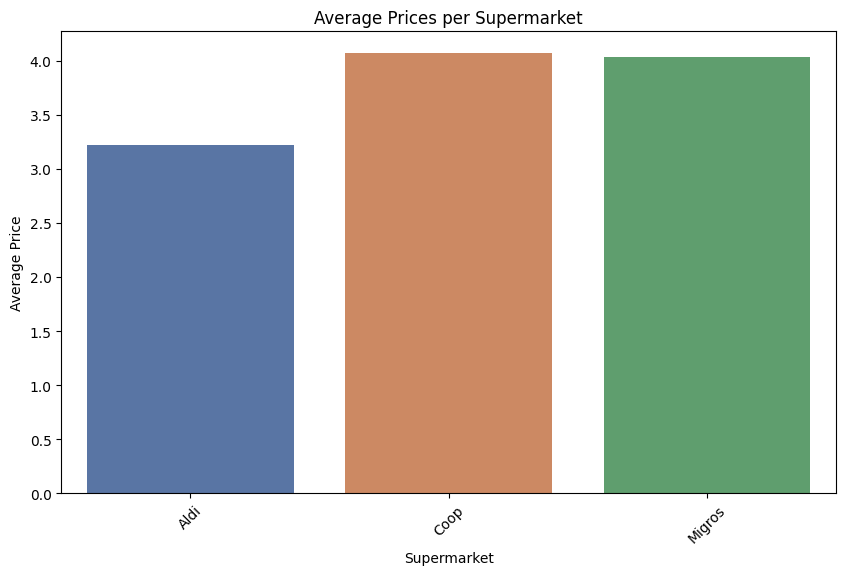

In [13]:
# Calculate the average price for each supermarket
average_prices = df_all.groupby('Supermarkt')['price_raw'].mean().reset_index()

# Bar chart for average prices
plt.figure(figsize=(10,6))
sns.barplot(x='Supermarkt', y='price_raw', data=average_prices, palette='deep')
plt.xlabel('Supermarket')
plt.ylabel('Average Price')
plt.title('Average Prices per Supermarket')
plt.xticks(rotation=45)
plt.show()


### Comparing max-price

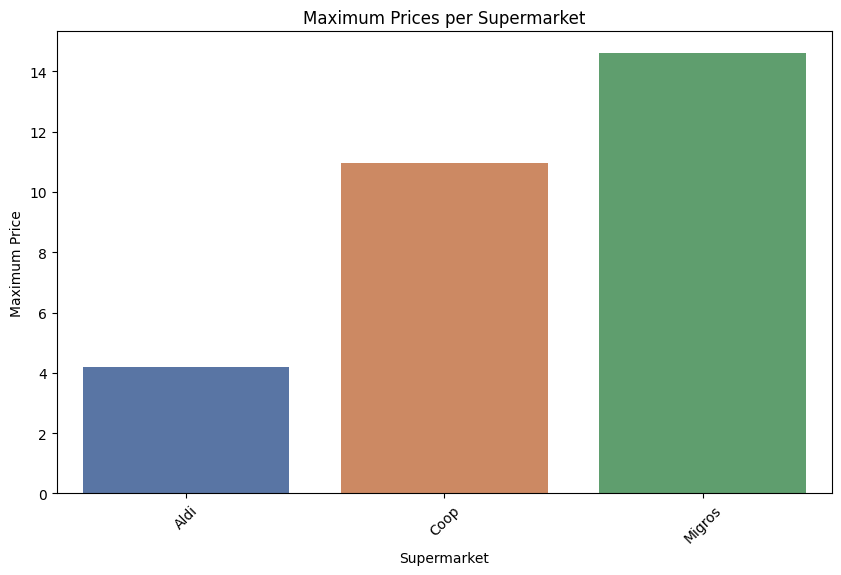

In [14]:
# Calculate the maximum price for each supermarket
max_prices = df_all.groupby('Supermarkt')['price_raw'].max().reset_index()

# Bar chart for maximum prices
plt.figure(figsize=(10,6))
sns.barplot(x='Supermarkt', y='price_raw', data=max_prices, palette='deep')
plt.xlabel('Supermarket')
plt.ylabel('Maximum Price')
plt.title('Maximum Prices per Supermarket')
plt.xticks(rotation=45)
plt.show()


### comparing min price

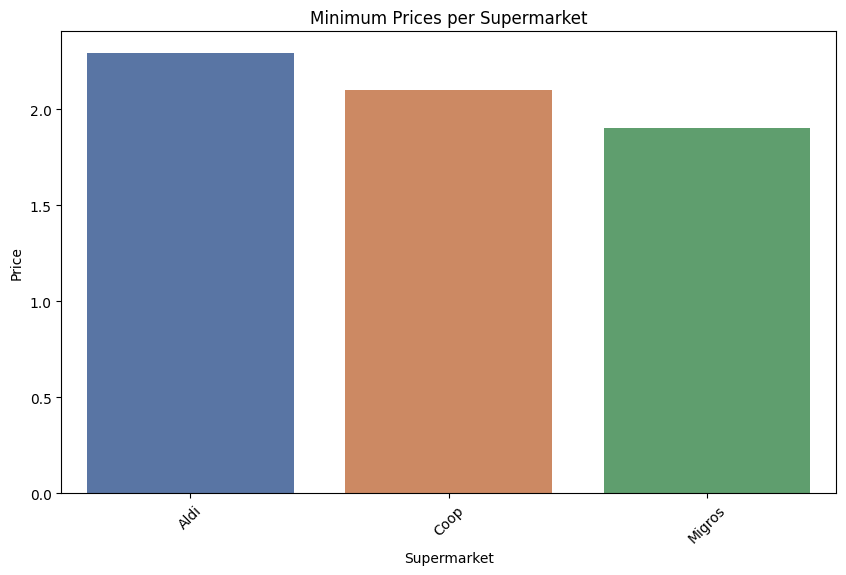

In [18]:
# Calculate the minimum price for each supermarket
min_prices = df_all.groupby('Supermarkt')['price_raw'].min().reset_index()

# Säulendiagramm für die Minimalpreise
plt.figure(figsize=(10,6))
sns.barplot(x='Supermarkt', y='price_raw', data=min_prices, palette='deep')
plt.xlabel('Supermarket')
plt.ylabel('Price')
plt.title('Minimum Prices per Supermarket')
plt.xticks(rotation=45)
plt.show()


    product_type web-scraper-order  \
0         butter      1698754764-1   
1         butter      1698754764-2   
2         butter      1698754764-3   
3         butter      1698754764-4   
4         butter      1698754764-5   
..           ...               ...   
119       butter     1698740582-60   
120       butter     1698740582-61   
121       butter     1698740582-62   
122       butter     1698740582-63   
123       butter     1698740582-64   

                                 web-scraper-start-url  \
0    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
1    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
2    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
3    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
4    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
..                                                 ...   
119  https://www.migros.ch/de/search?query=Butter&f...   
120  https://www.migros.ch/de/search?query=Butter&f...   
121  https://www.migr

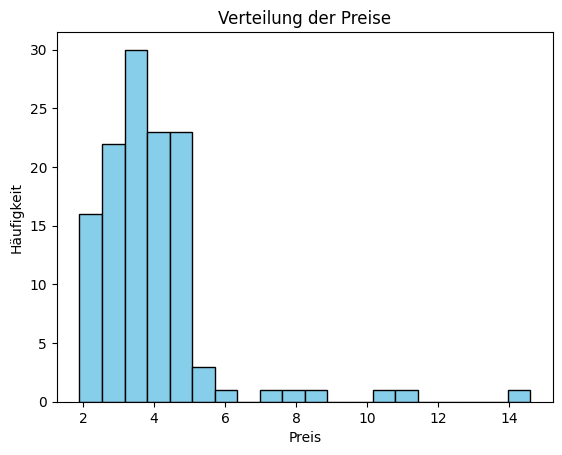

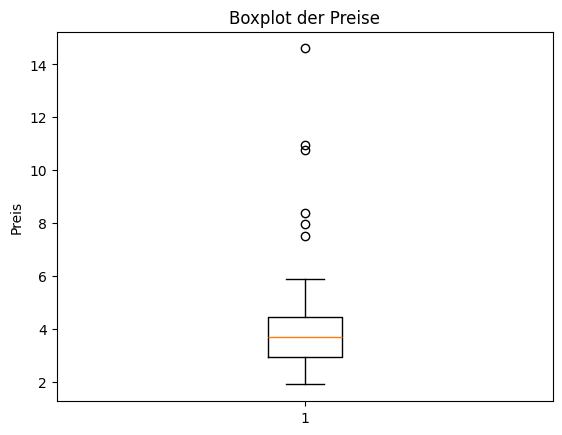

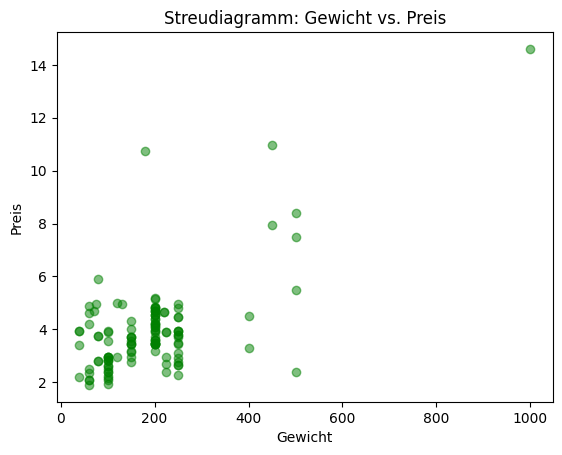

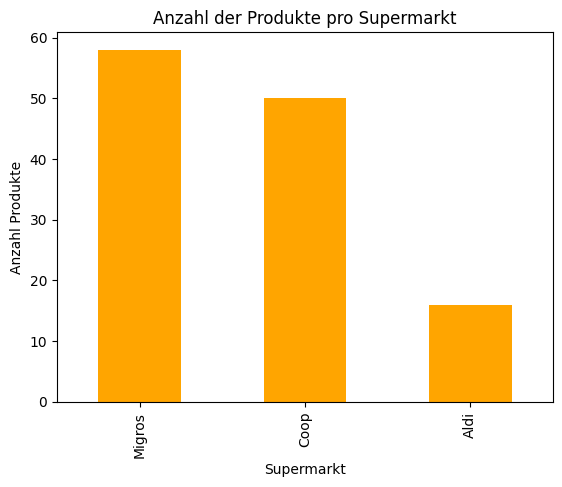

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Verbindung zur SQLite-Datenbank herstellen (Pfad zur Datenbank anpassen)
conn = sqlite3.connect('../groceries_database.db')  # Der Pfad '../' geht eine Ebene nach oben, wenn dein Notebook in /EDA/ liegt.

# Query the SQL-table for butter_table (all records)
cursor = conn.cursor()
cursor.execute('''SELECT *
               FROM butter_table''')

# Überprüfe, ob es Ergebnisse gibt
if cursor.description is not None:
    # Spaltennamen extrahieren
    columns = [description[0] for description in cursor.description]

    # DataFrame erstellen
    df_all = pd.DataFrame(cursor.fetchall(), columns=columns)

    # DataFrame anzeigen
    print(df_all)
else:
    print("Die Abfrage hat keine Ergebnisse zurückgegeben.")

# Histogramm
plt.hist(df_all['price_raw'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Preis')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der Preise')
plt.show()

# Boxplot
plt.boxplot(df_all['price_raw'])
plt.ylabel('Preis')
plt.title('Boxplot der Preise')
plt.show()

# Streudiagramm
plt.scatter(df_all['weight_raw'], df_all['price_raw'], alpha=0.5, color='green')
plt.xlabel('Gewicht')
plt.ylabel('Preis')
plt.title('Streudiagramm: Gewicht vs. Preis')
plt.show()

# Balkendiagramm
df_all['Supermarkt'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Supermarkt')
plt.ylabel('Anzahl Produkte')
plt.title('Anzahl der Produkte pro Supermarkt')
plt.show()
